### Importaciones

In [ ]:
pip install imblearn

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, multilabel_confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Train test

In [3]:
X = df.drop(columns=["quality"])
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


### Logistic Regresion multiclase

In [ ]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy (Logistic):", accuracy_score(y_test, pred))

### Logistic Regression Multiclase con GridSearchCV

In [ ]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=500))
])

param_grid = {"logreg__C": [0.1, 1, 3, 5, 10]}

grid = GridSearchCV(pipe,param_grid,cv=5,scoring="accuracy",n_jobs=-1)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

print("Mejor C:", grid.best_params_)

y_pred_log = best_model.predict(X_test)
print("Accuracy (Logistic GS):", accuracy_score(y_test, y_pred_log))


with open("logistic_pipeline_gs.pkl", "wb") as f:
    pickle.dump(best_model, f)


Accuracy (Logistic GS): 0.565625
Mejor C: {'logreg__C': 0.1}


### RandomForest con GridSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=11)

param_grid = {
    "n_estimators": [200, 300, 500],
    "max_depth": [3, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]}

grid = GridSearchCV(rf,param_grid,cv=5,scoring="accuracy",n_jobs=-1,verbose=1)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_
print("Mejores parámetros:", grid.best_params_)

y_pred_rf = best_rf.predict(X_test)
print("Accuracy Test (RF GS):", accuracy_score(y_test, y_pred_rf))


with open("random_forest_gs.pkl", "wb") as f:
    pickle.dump(best_rf, f)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Accuracy Test (RF GS): 0.68125
Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Adaboost con GridSearchCV

In [ ]:
ada = AdaBoostClassifier(random_state=11)

param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0]}

grid = GridSearchCV(ada,param_grid,cv=5,scoring="accuracy",n_jobs=-1,verbose=1)


grid.fit(X_train, y_train)
best_ada = grid.best_estimator_
print("Mejores parámetros:", grid.best_params_)


y_pred_ada = best_ada.predict(X_test)
print("Accuracy AdaBoost (GS):", accuracy_score(y_test, y_pred_ada))


with open("adaboost_gs.pkl", "wb") as f:
    pickle.dump(best_ada, f)

### Gradientboost con GridSearchCV

In [ ]:
gb = GradientBoostingClassifier(random_state=11)

param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4, 5],
    "subsample": [0.8, 1.0]}

grid = GridSearchCV(gb,param_grid,cv=5,scoring="accuracy",n_jobs=-1,verbose=1)


grid.fit(X_train, y_train)
best_gb = grid.best_estimator_
print("Mejores parámetros:", grid.best_params_)

y_pred_gb = best_gb.predict(X_test)
print("Accuracy GradientBoost (GS):", accuracy_score(y_test, y_pred_gb))


with open("gradient_boosting_gs.pkl", "wb") as f:
    pickle.dump(best_gb, f)

### XGBoost con GrindSearchCV

In [19]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=11,stratify=y_encoded)


xgb_model = xgb.XGBClassifier(objective="multi:softprob",num_class=len(np.unique(y_encoded)),eval_metric="mlogloss",random_state=11,n_jobs=-1,use_label_encoder=False)


param_grid = {
    "n_estimators": [200, 300, 500],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 4, 6, 8],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]}

grid = GridSearchCV(xgb_model,param_grid,cv=5,scoring="accuracy",n_jobs=-1,verbose=1)


grid.fit(X_train, y_train)
best_xgb = grid.best_estimator_


y_pred_xgb = best_xgb.predict(X_test)
print("Accuracy XGBoost (GS):", accuracy_score(y_test, y_pred_xgb))
print("Mejores parámetros:", grid.best_params_)


with open("mxgboost_gs.pkl", "wb") as f:
    pickle.dump({"model": best_xgb,"label_encoder": le},f)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\Itxaso\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [21:56:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy XGBoost (GS): 0.690625
Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
# pred_original = le.inverse_transform(y_pred_xgb)

### XGBoost con SMOTE

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

class_mapping = dict(zip(le.classes_, range(len(le.classes_))))
inv_class_mapping = {v: k for k, v in class_mapping.items()}

sampling_strategy = {
    class_mapping[3]: 800,
    class_mapping[4]: 800,
    class_mapping[7]: 800,
    class_mapping[8]: 800,
    class_mapping[5]: 1000,
    class_mapping[6]: 1000
}

X_res, y_res = smote.fit_resample(X, y_encoded)


X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=11,stratify=y_res)


xgb_model = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=len(np.unique(y_res)),
    eval_metric="mlogloss",
    learning_rate=0.1,
    max_depth=6,
    n_estimators=300,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Accuracy XGBoost + SMOTE:",
      accuracy_score(y_test, y_pred))

importances = xgb_model.get_booster().get_score(importance_type="gain")

feat_imp = (
    pd.DataFrame(importances.items(), columns=["Feature", "Importance"])
      .sort_values(by="Importance", ascending=False))

print(feat_imp)

with open("xgboost_smote_final.pkl", "wb") as f:
    pickle.dump({"model": xgb_model,"label_encoder": le},f)


### Aplico RandomizedSearch a mi mejor modelo (XGBoost)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Accuracy XGBoost (RS): 0.653125


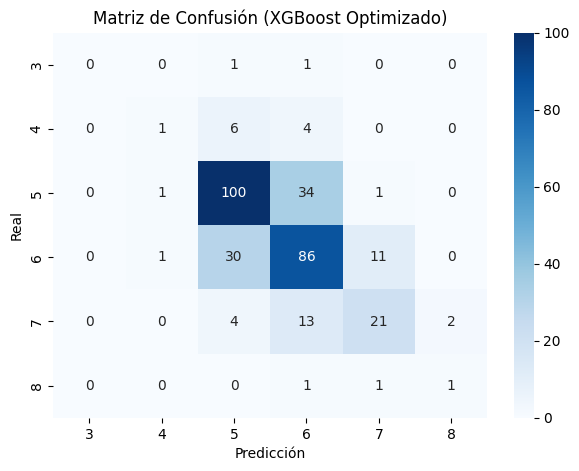

C:\Users\Itxaso\AppData\Local\Temp\ipykernel_13080\2679020561.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx], y=X.columns[sorted_idx], palette="viridis")


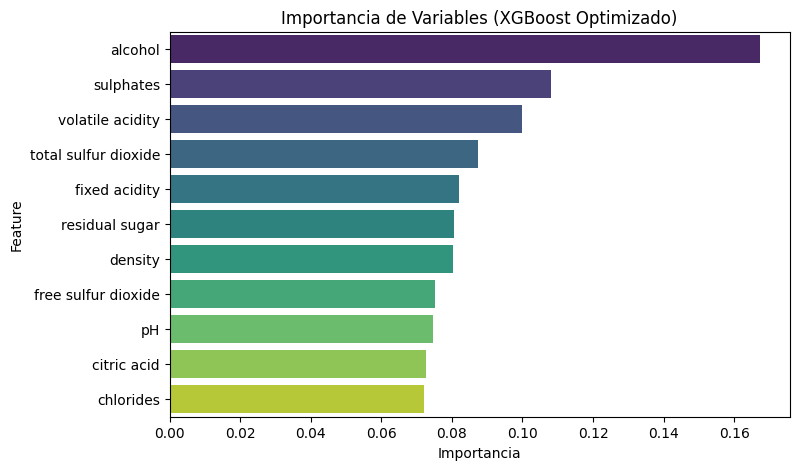

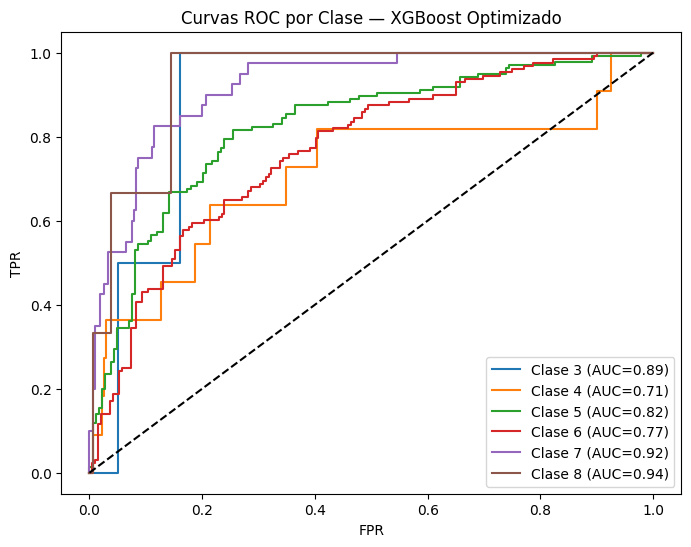


Ejemplo de predicciones (clase original): [7 6 5 6 5 7 6 5 5 8]


In [20]:
le = LabelEncoder()
y_encoded = le.fit_transform(df["quality"])
X = df.drop(columns=["quality"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


xgb_clf = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=len(le.classes_),
    eval_metric="mlogloss",
    random_state=42
)


param_dist = {
    "max_depth": np.arange(3, 12),
    "learning_rate": np.linspace(0.01, 0.2, 20),
    "n_estimators": np.arange(200, 1001, 50),
    "subsample": np.linspace(0.6, 1.0, 5),
    "colsample_bytree": np.linspace(0.6, 1.0, 5),
    "gamma": np.linspace(0, 5, 6),
    "min_child_weight": np.arange(1, 10)
}

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,
    scoring="accuracy",
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_xgb_random = random_search.best_estimator_
y_pred_random = best_xgb_random.predict(X_test)


print("Accuracy XGBoost (RS):", accuracy_score(y_test, y_pred_random))



cm = confusion_matrix(y_test, y_pred_random)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusión (XGBoost Optimizado)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()



importances = best_xgb_random.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[sorted_idx], y=X.columns[sorted_idx], palette="viridis")
plt.title("Importancia de Variables (XGBoost Optimizado)")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.show()



y_prob = best_xgb_random.predict_proba(X_test)
n_classes = len(le.classes_)

plt.figure(figsize=(8,6))

for c in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == c, y_prob[:, c])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Clase {le.classes_[c]} (AUC={roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.title("Curvas ROC por Clase — XGBoost Optimizado")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()


y_pred_original = le.inverse_transform(y_pred_random)
print("\nEjemplo de predicciones (clase original):", y_pred_original[:10])


Distribución de clases en el conjunto de entrenamiento después de SMOTE:
quality
6    543
5    543
7    543
4    543
3    543
8    543
Name: count, dtype: int64

Clasificación del modelo:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         9
           5       0.75      0.71      0.73       138
           6       0.68      0.59      0.63       119
           7       0.49      0.64      0.56        47
           8       0.20      0.25      0.22         4

    accuracy                           0.62       320
   macro avg       0.35      0.36      0.36       320
weighted avg       0.65      0.62      0.63       320

Precisión en el conjunto de prueba: 0.621875


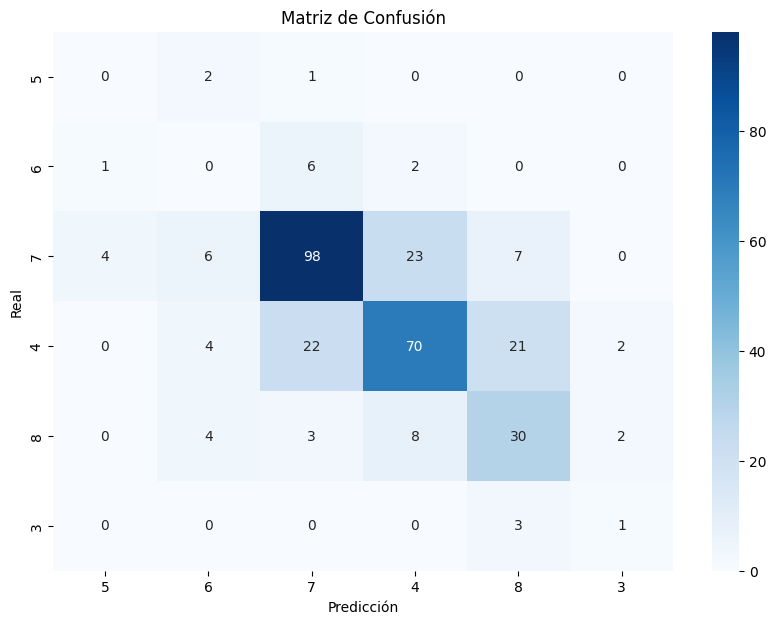

In [13]:

X = df.drop(columns=['quality']) 
y = df['quality']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


print("Distribución de clases en el conjunto de entrenamiento después de SMOTE:")
print(y_train_res.value_counts())


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)


y_pred = clf.predict(X_test)


print("\nClasificación del modelo:")
print(classification_report(y_test, y_pred))


print("Precisión en el conjunto de prueba:", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['quality'].unique(), yticklabels=df['quality'].unique())
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


Clases originales: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
Clases codificadas: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

Accuracy XGBoost: 0.65
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.07      0.10      0.08        10
           2       0.75      0.68      0.72       130
           3       0.67      0.67      0.67       132
           4       0.61      0.67      0.64        42
           5       0.14      0.20      0.17         5

    accuracy                           0.65       320
   macro avg       0.37      0.39      0.38       320
weighted avg       0.67      0.65      0.66       320



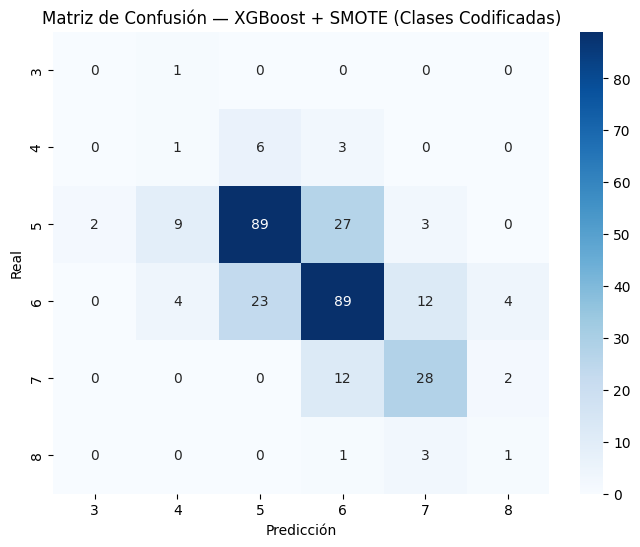

In [15]:

X = df.drop(columns=["quality"])
y = df["quality"]


le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Clases originales:", sorted(y.unique()))
print("Clases codificadas:", sorted(set(y_encoded)))



X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)


sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)



xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=len(le.classes_),
    eval_metric="mlogloss",
    random_state=42
)

xgb_model.fit(X_train_res, y_train_res)


y_pred_xgb = xgb_model.predict(X_test)


print("\nAccuracy XGBoost:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión — XGBoost + SMOTE (Clases Codificadas)")
plt.show()


quality_group
1    1319
2     217
0      63
Name: count, dtype: int64
Distribución tras SMOTE:
quality_group
1    1055
2    1055
0    1055
Name: count, dtype: int64

Accuracy: 0.84375

Classification report:
               precision    recall  f1-score   support

           0       0.29      0.31      0.30        13
           1       0.93      0.88      0.90       264
           2       0.61      0.79      0.69        43

    accuracy                           0.84       320
   macro avg       0.61      0.66      0.63       320
weighted avg       0.86      0.84      0.85       320



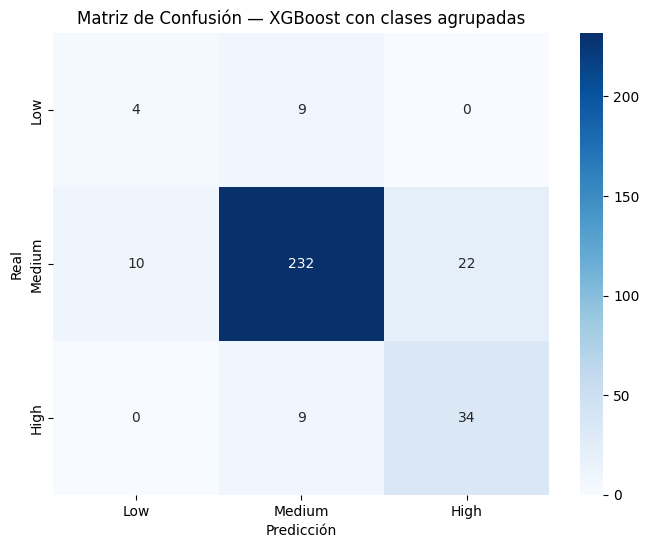

In [16]:

def map_quality(q):
    if q <= 4:
        return 0   # Low
    elif q <= 6:
        return 1   # Medium
    else:
        return 2   # High

df["quality_group"] = df["quality"].apply(map_quality)

print(df["quality_group"].value_counts())



X = df.drop(columns=["quality", "quality_group"])
y = df["quality_group"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


smote = SMOTE(random_state=11)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Distribución tras SMOTE:")
print(pd.Series(y_train_res).value_counts())



xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=3,
    eval_metric="mlogloss",
    learning_rate=0.1,
    max_depth=6,
    n_estimators=300,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train_res, y_train_res)



y_pred = xgb_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))



cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión — XGBoost con clases agrupadas")
plt.show()


In [ ]:
X = df.drop(columns=["quality", "quality_group"])
y = df["quality_group"]

# ============================================================
# 2. Normalizar etiquetas: convertir clases 3–8 → 0–5
# ============================================================
# Si tus clases originales son [3,4,5,6,7,8], las mapeamos:
etiquetas_originales = sorted(y.unique())
mapeo = {c: i for i, c in enumerate(etiquetas_originales)}
y = y.map(mapeo)

print("Clases nuevas:", sorted(y.unique()))

# ============================
# 3. Train/Test
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================
# 4. Pipeline con SMOTE + PCA + XGBoost
# ============================
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('pca', PCA()),
    ('clf', xgb.XGBClassifier(objective="multi:softprob", num_class=len(np.unique(y))))
])

# ============================
# 5. GridSearchCV
# ============================
param_grid = {
    'pca__n_components': [3, 5, 7],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.05, 0.1],
    'clf__n_estimators': [100, 200]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("\nMejores parámetros:", grid.best_params_)
print("Mejor accuracy de validación:", grid.best_score_)

# ============================
# 6. Evaluación final
# ============================
best_model = grid.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("\nAccuracy train:", accuracy_score(y_train, y_pred_train))
print("Accuracy test:", accuracy_score(y_test, y_pred_test))

print("\nClassification report:\n")
print(classification_report(y_test, y_pred_test))

# ============================
# 7. Matriz de confusión
# ============================
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
